# 1. Importing Packages

In [282]:
from glob import glob
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from yellowbrick.regressor import residuals_plot, ResidualsPlot
from yellowbrick.regressor import prediction_error, PredictionError

# etc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# increasing the display domain of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 2. Loading Raw Data

In [3]:
path = r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Dataset\*.csv'
path_maize_data = [p for p in glob(path)]
path_maize_data

['C:\\Users\\bm638305\\OneDrive - Knights - University of Central Florida\\UCF\\Class\\Fall 22\\STA5703_Data Mining Methodology I\\Projects\\Project 2\\Dataset\\maize_data.csv']

In [4]:
df_maize_data = pd.read_csv(path_maize_data[0], sep=';', low_memory=False)

In [5]:
# df_maize_data.head()

In [6]:
df_maize_data.drop(columns=['Unnamed: 0'], inplace=True)

In [112]:
df_maize_data.shape

(4494, 7390)

# 3. Data Preprocessing

## 3.1 Exploratory Data Analysis

In [115]:
# df_maize_data.info(verbose=True, show_counts=True)

In [121]:
# list(df_maize_data.columns.values)

In [10]:
df_maize_data.drop(columns=['Geno_Code', 'pop', 'Entry'], inplace=True)

In [118]:
df_maize_data.isna().sum().sum()

0

In [119]:
df_maize_data.dropna(inplace=True)

In [278]:
df_maize_data.shape

(4494, 7390)

## 3.2 Data Wrangling

In [217]:
PROC_df_maize_data = pd.DataFrame()
list_features = df_maize_data.columns.values

for i in range(len(list_features)):
    feature = list_features[i]
    
    df_maize_data[feature] = df_maize_data[feature].astype(str)
    df_maize_data_TEMP = pd.DataFrame(df_maize_data[feature].str.replace(',', '.').astype(float), columns=[feature])
    
    
    PROC_df_maize_data = pd.concat([PROC_df_maize_data, df_maize_data_TEMP], axis=1)

# PROC_df_maize_data.head()
# PROC_df_maize_data.to_csv(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Dataset\PROC_maize_data.csv')

In [222]:
PROC_df_maize_data['DtoA'].head()

0    75.5364
1    76.9075
2    75.2646
3    73.6933
4    79.2441
Name: DtoA, dtype: float64

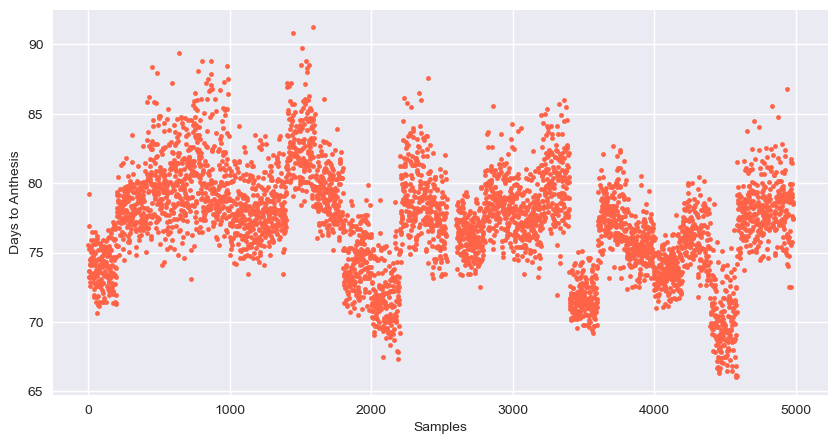

In [245]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(PROC_df_maize_data['DtoA'], '.', color='tomato')

plt.ylabel('Days to Anthesis', size='10')
plt.xlabel('Samples', size='10')
# plt.grid(True)

plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\1.jpg', dpi=250)
plt.show()

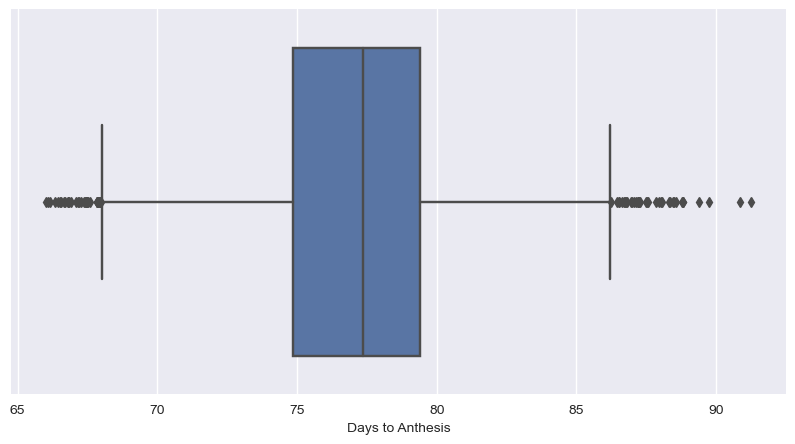

In [246]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

sns.boxplot(x='DtoA', data=PROC_df_maize_data)

plt.xlabel('Days to Anthesis', size='10')

plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\2.jpg', dpi=250)
plt.show()

In [99]:
X = PROC_df_maize_data.iloc[:, :-1]
X = X.round()
y = PROC_df_maize_data.iloc[:, -1]

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((3370, 7389), (1124, 7389))

# 4. Feature Selection

## 4.1 Wrapper Method -----> Recursive Feature ELimination (RFE)

In [99]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=50)
# rfe.fit(X_train, y_train)

In [127]:
X_train_TRANSFORMED = rfe.transform(X_train)
X_test_TRANSFORMED = rfe.transform(X_test)

# X_train_TRANSFORMED.shape, X_test.shape
# type(X_train_TRANSFORMED), type(X_test_TRANSFORMED)

features_selected = list(X_train.columns[(rfe.get_support())])

PROC_X_train = pd.DataFrame(X_train_TRANSFORMED, columns=features_selected)
PROC_X_test = pd.DataFrame(X_test_TRANSFORMED, columns=features_selected)

# PROC_X_train.head()

In [281]:
X_train.columns[(rfe.get_support())]

Index(['m62', 'm143', 'm174', 'm331', 'm364', 'm439', 'm571', 'm925', 'm1111',
       'm1265', 'm1389', 'm1599', 'm1642', 'm1761', 'm1907', 'm2164', 'm2220',
       'm2313', 'm2419', 'm2439', 'm2656', 'm2958', 'm3056', 'm3421', 'm3719',
       'm3875', 'm4037', 'm4173', 'm4227', 'm4442', 'm4772', 'm4816', 'm4956',
       'm5280', 'm5437', 'm5530', 'm5863', 'm5919', 'm5954', 'm6067', 'm6389',
       'm6466', 'm6512', 'm6659', 'm6809', 'm6821', 'm7055', 'm7112', 'm7176',
       'm7291'],
      dtype='object')

# 5. Model Training

## 5.1 Linear Regression

In [343]:
lin_reg = LinearRegression()
lin_reg.fit(PROC_X_train, y_train)

LinearRegression()

In [344]:
rSquared_lin_reg = lin_reg.score(PROC_X_train, y_train)
print(rSquared_lin_reg)

0.09084244932694474


In [345]:
y_pred = lin_reg.predict(PROC_X_test)

rmse_lin_reg = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print(rmse_lin_reg)

3.5812548975433343


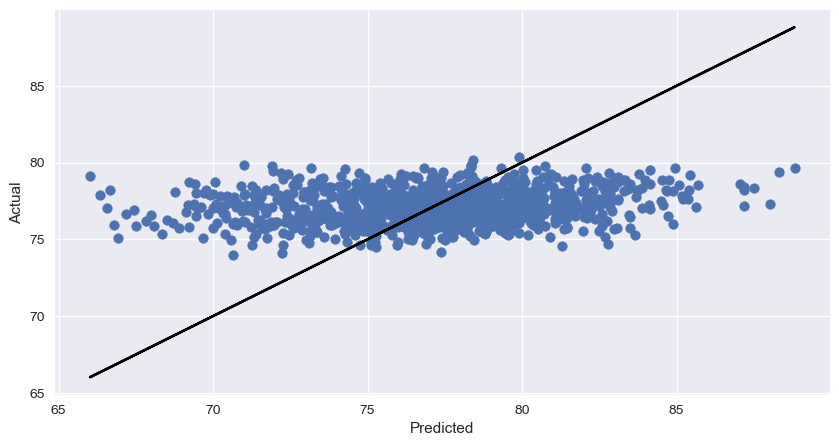

In [346]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

plt.plot(y_test, y_test, color='black')
plt.scatter(y_test, y_pred)

plt.xlabel('Predicted')
plt.ylabel('Actual')
  
plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\lin_reg_1.jpg', dpi=250)
plt.show()

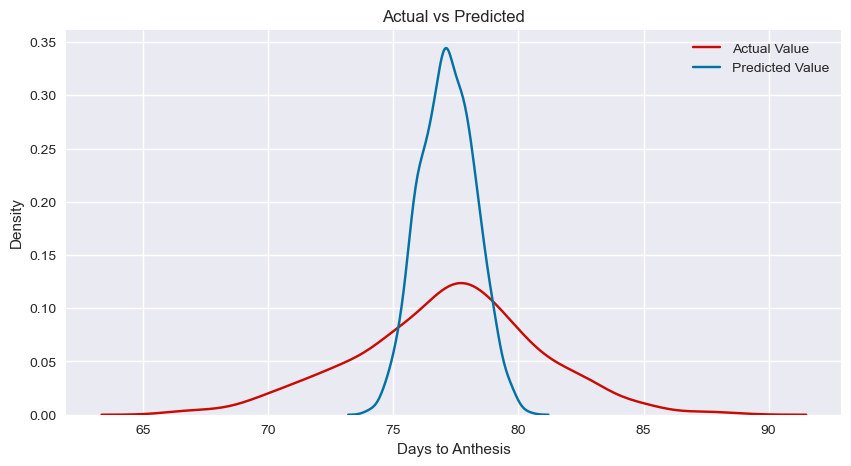

In [347]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 5))

ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Predicted Value' , ax=ax)

plt.title('Actual vs Predicted')
plt.xlabel('Days to Anthesis')

plt.legend()

plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\lin_reg_2.jpg', dpi=250)
plt.show()

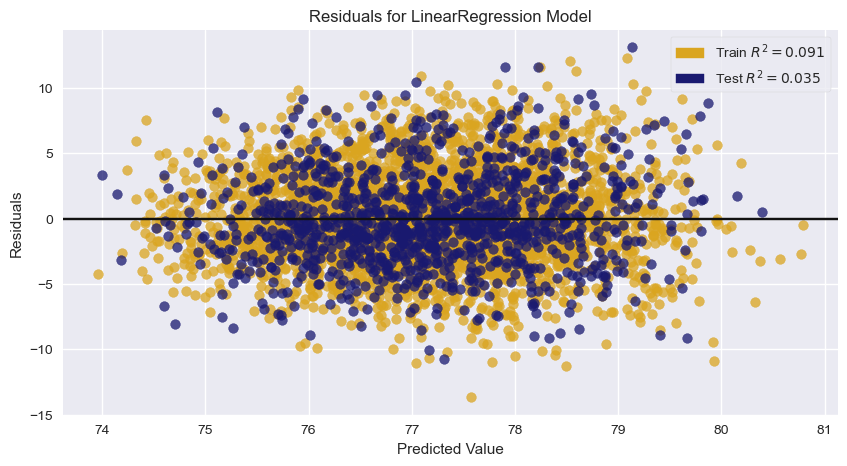

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [348]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

visualizer = ResidualsPlot(lin_reg, hist=False, train_color='goldenrod', test_color='midnightblue')
visualizer.fit(PROC_X_train, y_train) 
visualizer.score(PROC_X_test, y_test)

visualizer.show()

## 5.2 Huber Regression

In [349]:
hub_reg = HuberRegressor()
hub_reg.fit(PROC_X_train, y_train)

HuberRegressor()

In [350]:
rSquared_hub_reg = hub_reg.score(PROC_X_train, y_train)
print(rSquared_hub_reg)

0.08499164353273214


In [351]:
y_pred = hub_reg.predict(PROC_X_test)

rmse_hub_reg = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print(rmse_hub_reg)

3.578323224855461


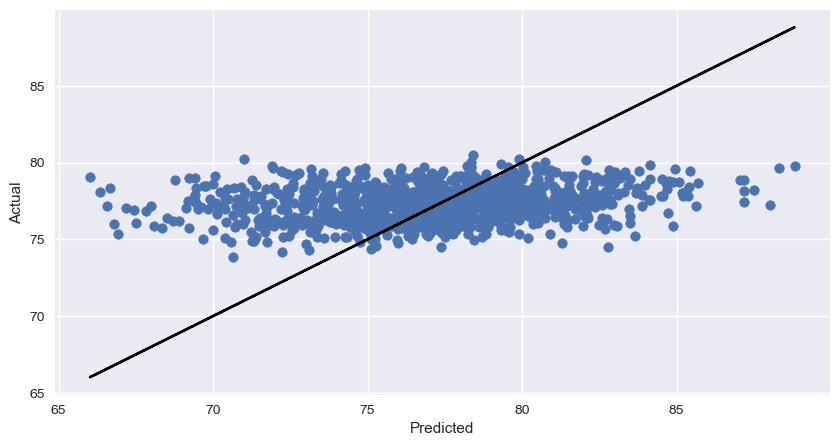

In [352]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

plt.plot(y_test, y_test, color='black')
plt.scatter(y_test, y_pred)

plt.xlabel('Predicted')
plt.ylabel('Actual')
  
plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\hub_reg_1.jpg', dpi=250)
plt.show()

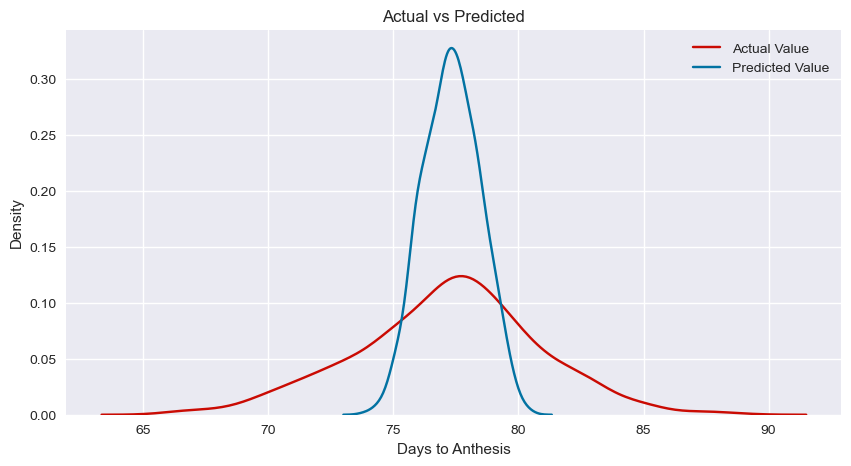

In [353]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 5))

ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Predicted Value' , ax=ax)

plt.title('Actual vs Predicted')
plt.xlabel('Days to Anthesis')

plt.legend()

plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\hub_reg_2.jpg', dpi=250)
plt.show()

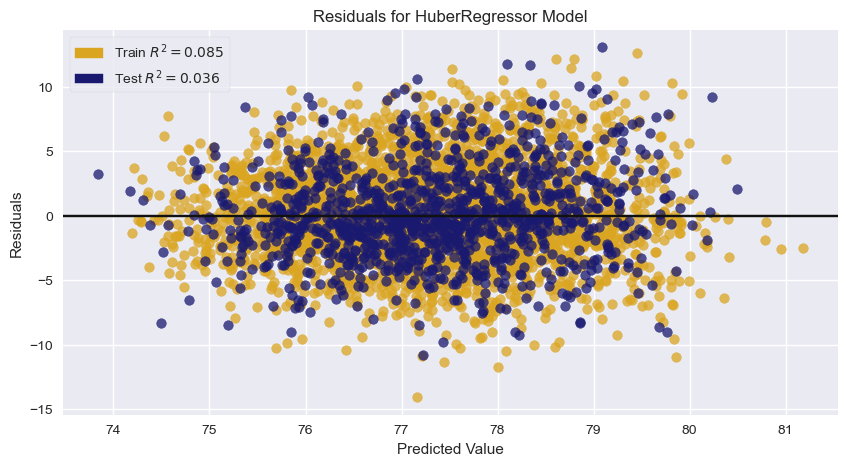

<AxesSubplot:title={'center':'Residuals for HuberRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [354]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

visualizer = ResidualsPlot(hub_reg, hist=False, train_color='goldenrod', test_color='midnightblue')
visualizer.fit(PROC_X_train, y_train) 
visualizer.score(PROC_X_test, y_test)

visualizer.show()

## 5.3 Ridge Regression

In [355]:
ridge_reg = Ridge()
ridge_reg.fit(PROC_X_train, y_train)

Ridge()

In [356]:
rSquared_ridge_reg = ridge_reg.score(PROC_X_train, y_train)
print(rSquared_ridge_reg)

0.09084243608463871


In [357]:
y_pred = ridge_reg.predict(PROC_X_test)

rmse_ridge_reg = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print(rmse_ridge_reg)

3.5812108646585776


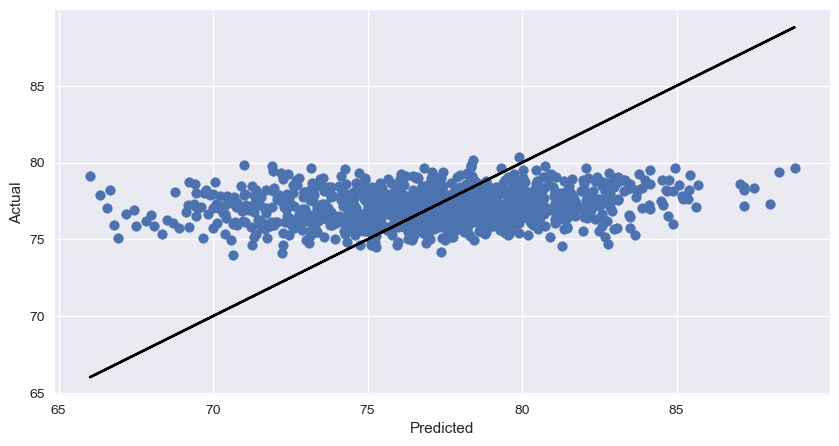

In [358]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

plt.plot(y_test, y_test, color='black')
plt.scatter(y_test, y_pred)

plt.xlabel('Predicted')
plt.ylabel('Actual')
  
plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\ridge_reg_1.jpg', dpi=250)
plt.show()

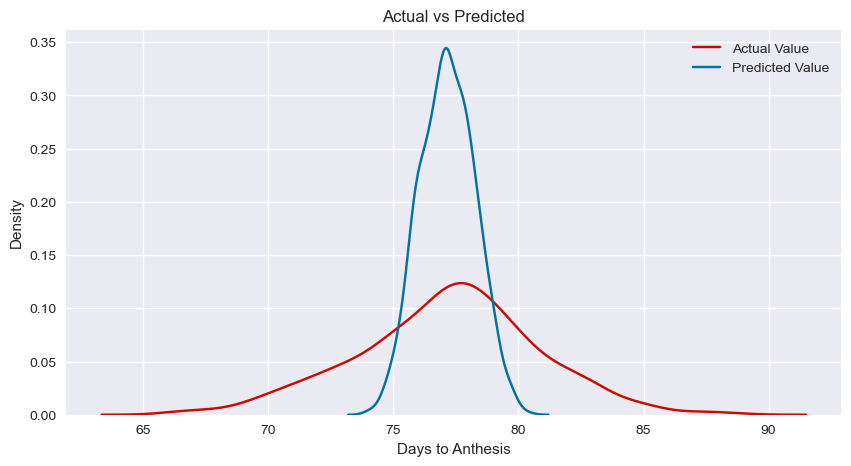

In [359]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 5))

ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Predicted Value' , ax=ax)

plt.title('Actual vs Predicted')
plt.xlabel('Days to Anthesis')

plt.legend()

plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\ridge_reg_2.jpg', dpi=250)
plt.show()

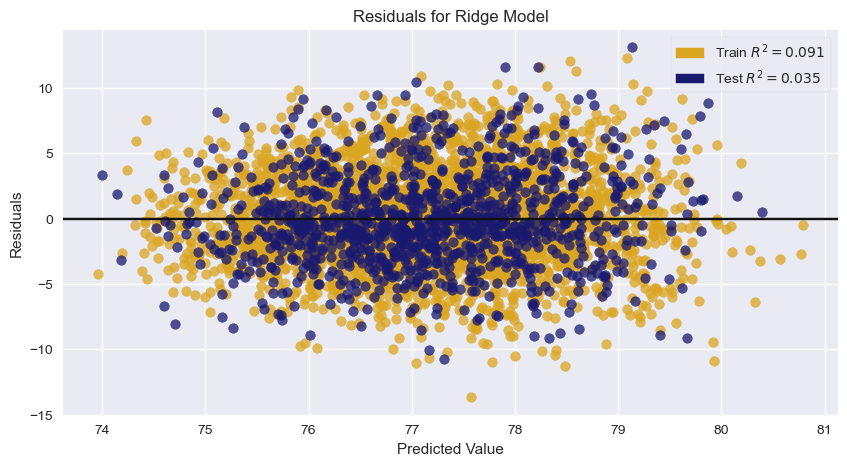

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [360]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

visualizer = ResidualsPlot(ridge_reg, hist=False, train_color='goldenrod', test_color='midnightblue')
visualizer.fit(PROC_X_train, y_train) 
visualizer.score(PROC_X_test, y_test)

visualizer.show()

## 5.4 Lasso Regression

In [361]:
lasso_reg = Lasso()
lasso_reg.fit(PROC_X_train, y_train)

Lasso()

In [362]:
rSquared_lasso_reg = lasso_reg.score(PROC_X_train, y_train)
print(rSquared_lasso_reg)

0.0


In [363]:
y_pred = lasso_reg.predict(PROC_X_test)

rmse_lasso_reg = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print(rmse_lasso_reg)

3.6450442263864633


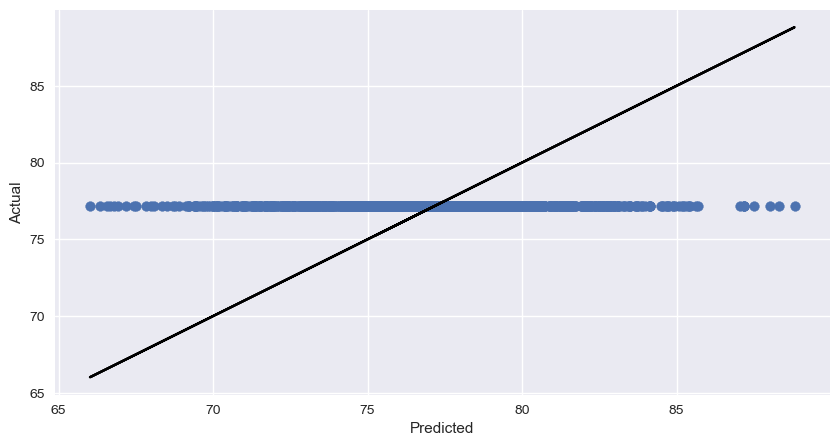

In [364]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

plt.plot(y_test, y_test, color='black')
plt.scatter(y_test, y_pred)

plt.xlabel('Predicted')
plt.ylabel('Actual')
  
plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\lasso_reg_1.jpg', dpi=250)
plt.show()

In [365]:
# plt.style.use('seaborn')
# plt.figure(figsize=(10, 5))

# ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
# sns.distplot(y_pred, hist=False, color='b', label='Predicted Value' , ax=ax)

# plt.title('Actual vs Predicted')
# plt.xlabel('Days to Anthesis')

# plt.legend()

# plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\lasso_reg_2.jpg', dpi=250)
# plt.show()

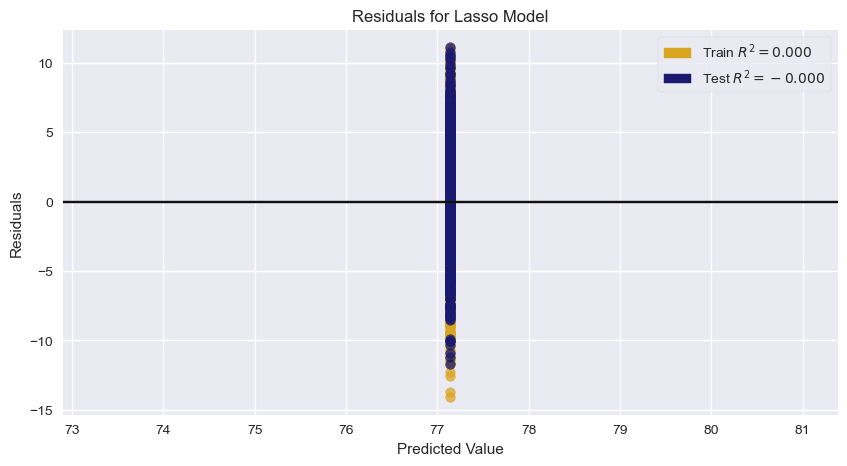

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [366]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

visualizer = ResidualsPlot(lasso_reg, hist=False, train_color='goldenrod', test_color='midnightblue')
visualizer.fit(PROC_X_train, y_train) 
visualizer.score(PROC_X_test, y_test)

visualizer.show()

## 5.5 Support Vector Regression

In [367]:
sv_reg = SVR()
sv_reg.fit(PROC_X_train, y_train)

SVR()

In [368]:
rSquared_sv_reg = sv_reg.score(PROC_X_train, y_train)
print(rSquared_sv_reg)

0.2558907771828791


In [369]:
y_pred = sv_reg.predict(PROC_X_test)

rmse_sv_reg = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print(rmse_sv_reg)

3.607394502402458


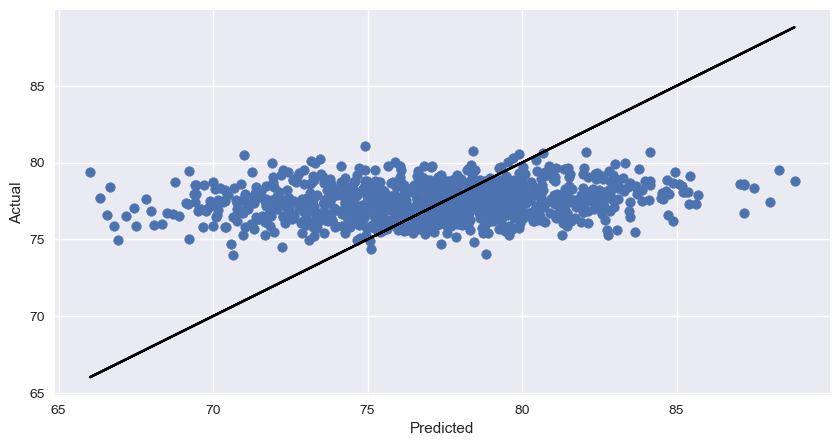

In [370]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

plt.plot(y_test, y_test, color='black')
plt.scatter(y_test, y_pred)

plt.xlabel('Predicted')
plt.ylabel('Actual')
  
plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\sv_reg_1.jpg', dpi=250)
plt.show()

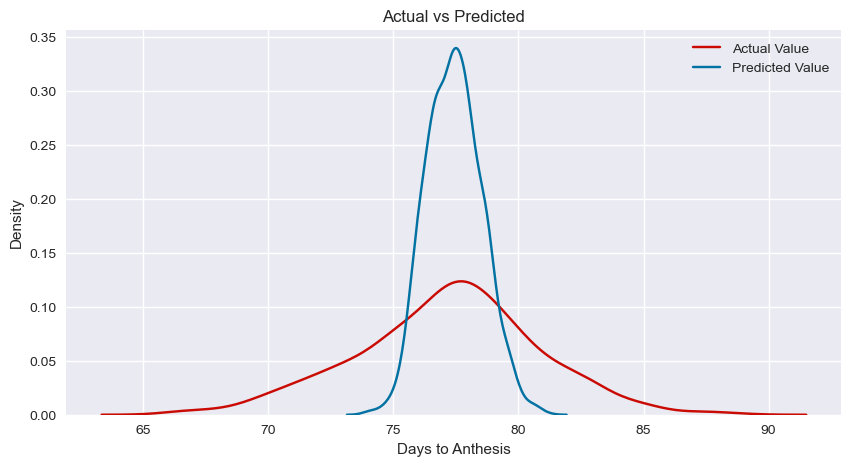

In [371]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 5))

ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Predicted Value' , ax=ax)

plt.title('Actual vs Predicted')
plt.xlabel('Days to Anthesis')

plt.legend()

plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\sv_reg_2.jpg', dpi=250)
plt.show()

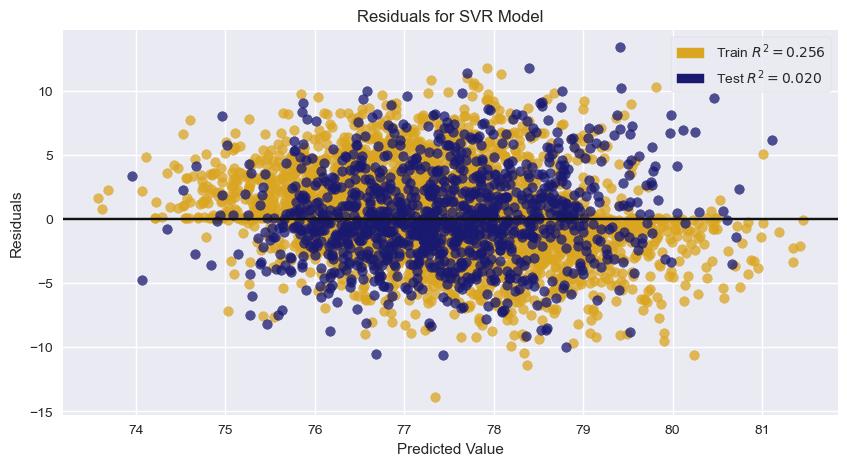

<AxesSubplot:title={'center':'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [372]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

visualizer = ResidualsPlot(sv_reg, hist=False, train_color='goldenrod', test_color='midnightblue')
visualizer.fit(PROC_X_train, y_train) 
visualizer.score(PROC_X_test, y_test)

visualizer.show()

## 5.6 Random Forest Regression

In [373]:
rf_reg = RandomForestRegressor()
rf_reg.fit(PROC_X_train, y_train)

RandomForestRegressor()

In [374]:
rSquared_rf_reg = rf_reg.score(PROC_X_train, y_train)
print(rSquared_rf_reg)

0.8692812277923303


In [375]:
y_pred = rf_reg.predict(PROC_X_test)

rmse_rf_reg = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print(rmse_rf_reg)

3.5993982426960223


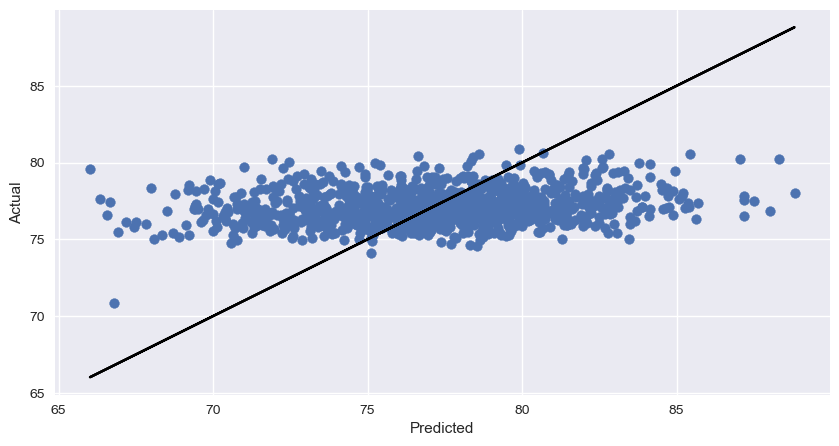

In [376]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

plt.plot(y_test, y_test, color='black')
plt.scatter(y_test, y_pred)

plt.xlabel('Predicted')
plt.ylabel('Actual')
  
plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\rf_reg_1.jpg', dpi=250)
plt.show()

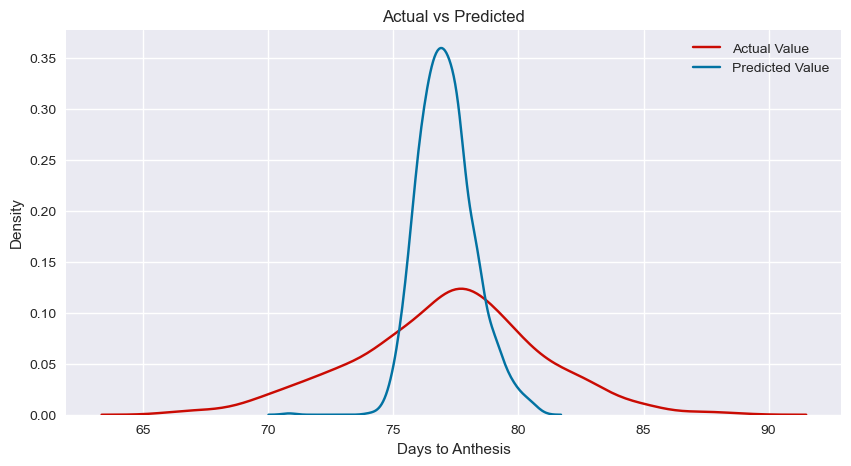

In [377]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 5))

ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Predicted Value' , ax=ax)

plt.title('Actual vs Predicted')
plt.xlabel('Days to Anthesis')

plt.legend()

plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\rf_reg_2.jpg', dpi=250)
plt.show()

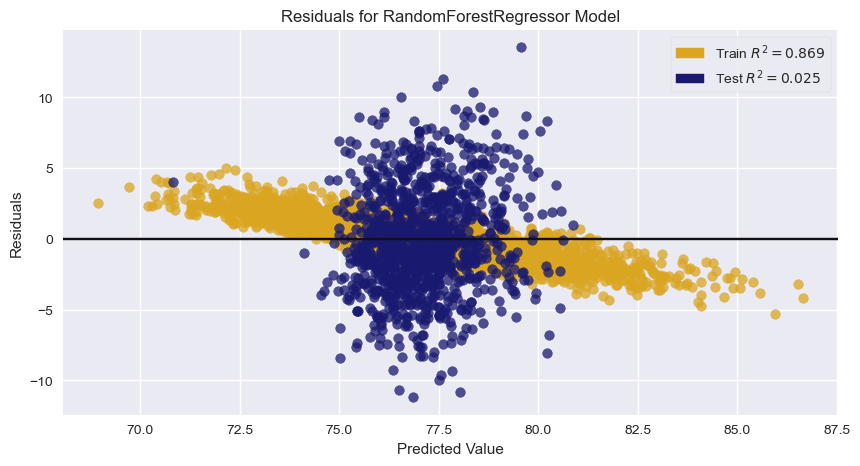

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [378]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

visualizer = ResidualsPlot(rf_reg, hist=False, train_color='goldenrod', test_color='midnightblue')
visualizer.fit(PROC_X_train, y_train) 
visualizer.score(PROC_X_test, y_test)

visualizer.show()

## 5.7 Extreme Gradient Boosting Regression

In [379]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(PROC_X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [380]:
rSquared_xgb_reg = xgb_reg.score(PROC_X_train, y_train)
print(rSquared_xgb_reg)

0.9864517357419748


In [381]:
y_pred = xgb_reg.predict(PROC_X_test)

rmse_xgb_reg = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print(rmse_xgb_reg)

3.9583554279356887


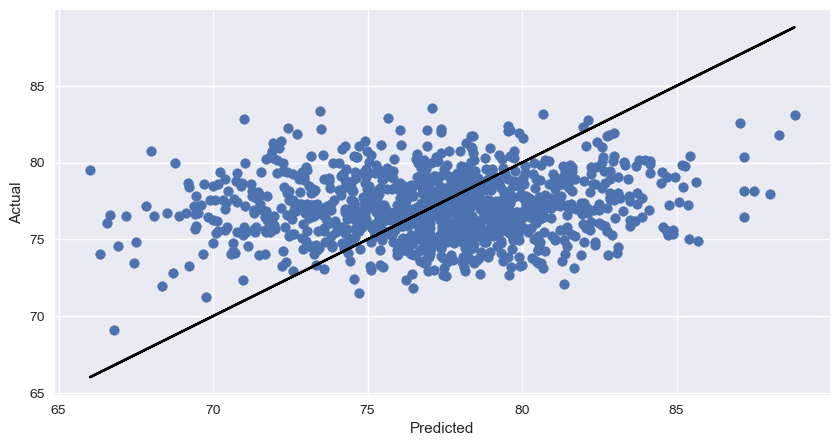

In [382]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

plt.plot(y_test, y_test, color='black')
plt.scatter(y_test, y_pred)

plt.xlabel('Predicted')
plt.ylabel('Actual')
  
plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\xgb_reg_1.jpg', dpi=250)
plt.show()

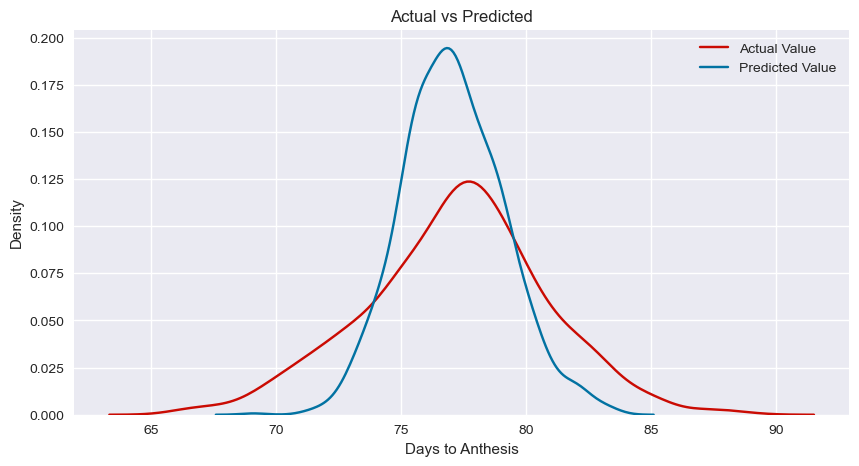

In [383]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 5))

ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Predicted Value' , ax=ax)

plt.title('Actual vs Predicted')
plt.xlabel('Days to Anthesis')

plt.legend()

plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\xgb_reg_2.jpg', dpi=250)
plt.show()

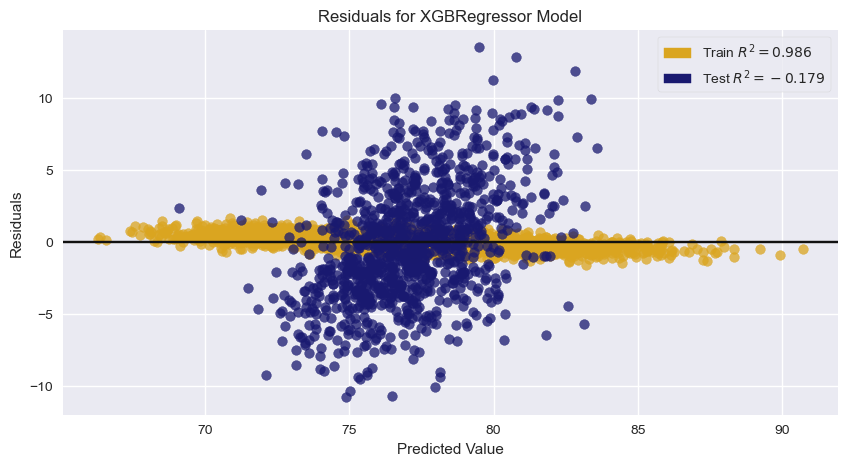

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [384]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

visualizer = ResidualsPlot(xgb_reg, hist=False, train_color='goldenrod', test_color='midnightblue')
visualizer.fit(PROC_X_train, y_train) 
visualizer.score(PROC_X_test, y_test)

visualizer.show()

In [385]:
# plt.figure(figsize=(10, 10))

# visualizer = PredictionError(xgb_reg)

# visualizer.fit(PROC_X_train, y_train) 
# visualizer.score(PROC_X_test, y_test)

# visualizer.show()

# 6. Result Formulation

In [386]:
list_models = ['MLR', 'Huber', 'Ridge', 'SVR', 'RF', 'XGBoost']
list_rmse = [rmse_lin_reg, rmse_hub_reg, rmse_ridge_reg, rmse_sv_reg, rmse_rf_reg, rmse_xgb_reg]
list_rSquared = [rSquared_lin_reg, rSquared_hub_reg, rSquared_ridge_reg, rSquared_sv_reg, rSquared_rf_reg, rSquared_xgb_reg]

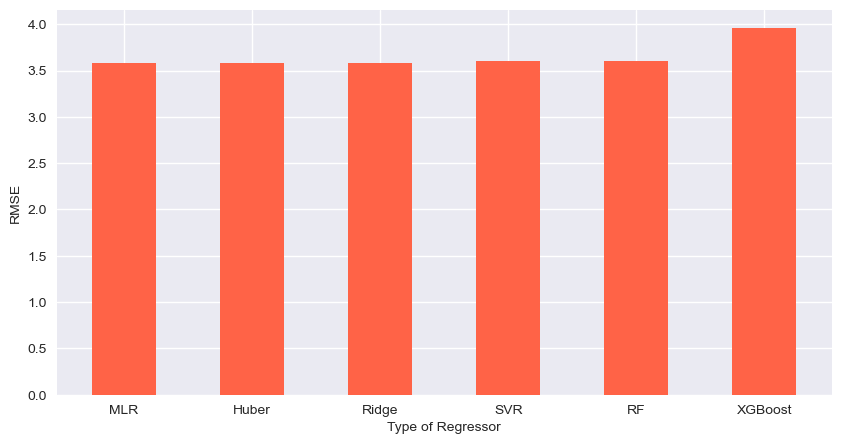

In [387]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 5))

plt.bar(list_models, list_rmse, color='tomato',  width = 0.5)

plt.ylabel('RMSE', size='10')
plt.xlabel('Type of Regressor', size='10')

plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\RMSE.jpg', dpi=250)
plt.show()

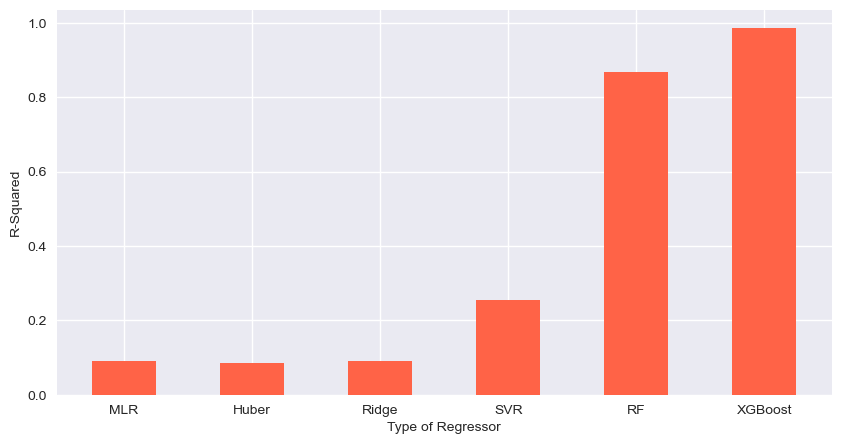

In [388]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 5))

plt.bar(list_models, list_rSquared, color='tomato',  width = 0.5)

plt.ylabel('R-Squared', size='10')
plt.xlabel('Type of Regressor', size='10')

plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\STA5703_Data Mining Methodology I\Projects\Project 2\Result\RSquared.jpg', dpi=250)
plt.show()